In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape

(158, 12)

In [12]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [24]:
li= ["Country", "Region"]
for i in li:
    x= list(map(lambda x: x.isspace(), df[i]))

    for i in x:
        if (i)== True:
            print(i)

No empty spaces available in object datatype columns

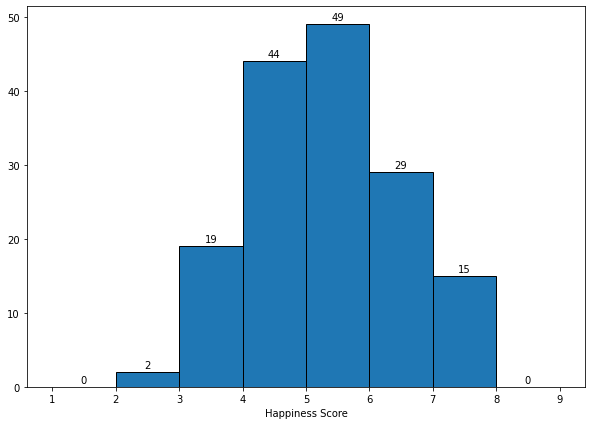

In [4]:
fig,ax= plt.subplots(figsize=(10,7))
plt.hist(df["Happiness Score"],  bins=[1,2,3,4,5,6,7,8,9], edgecolor="Black")
plt.xlabel("Happiness Score")

for a in ax.containers:
    ax.bar_label(a, padding=2)    #padding is the space between bar and bar values

Text(0.5, 1.0, 'GDP vs Happiness score')

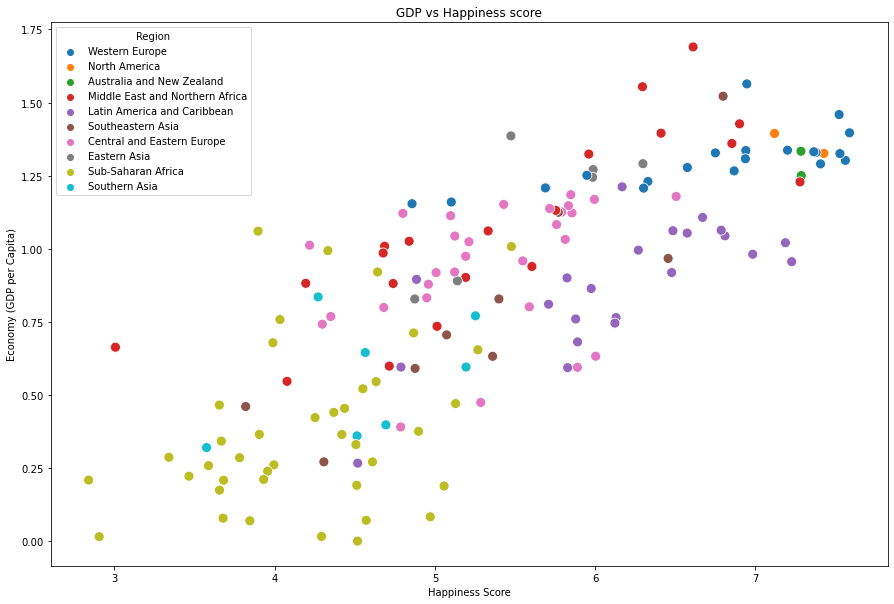

In [30]:
plt.figure(figsize=(15,10))
sns.scatterplot(df["Happiness Score"], df["Economy (GDP per Capita)"], hue= df["Region"], s=100)
plt.title("GDP vs Happiness score")

In [32]:
df.groupby("Region")["Economy (GDP per Capita)"].mean()

Region
Australia and New Zealand          1.291880
Central and Eastern Europe         0.942438
Eastern Asia                       1.151780
Latin America and Caribbean        0.876815
Middle East and Northern Africa    1.066974
North America                      1.360400
Southeastern Asia                  0.789054
Southern Asia                      0.560486
Sub-Saharan Africa                 0.380473
Western Europe                     1.298596
Name: Economy (GDP per Capita), dtype: float64

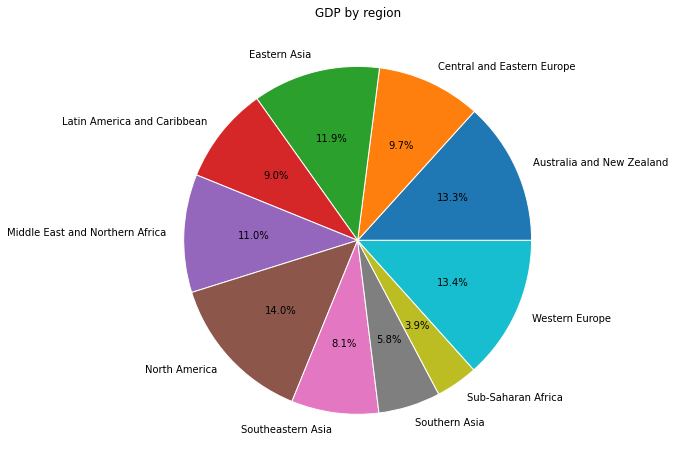

In [57]:
plt.figure(figsize=(8,8))
df.groupby("Region")["Economy (GDP per Capita)"].mean().plot.pie(autopct="%1.1f%%", 
                                                                 wedgeprops = {"edgecolor" : "white",'linewidth':1})
plt.title("GDP by region")
plt.ylabel("")
plt.show()

In [59]:
#countries in each region
df.groupby("Region")["Country"].count()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
Name: Country, dtype: int64

In [99]:
#Corruption
df.groupby("Region")["Trust (Government Corruption)"].mean().sort_values(ascending=True)

Region
Central and Eastern Europe         0.086674
Southern Asia                      0.102536
Latin America and Caribbean        0.117172
Sub-Saharan Africa                 0.123878
Eastern Asia                       0.127695
Southeastern Asia                  0.151276
Middle East and Northern Africa    0.181702
Western Europe                     0.231463
North America                      0.244235
Australia and New Zealand          0.392795
Name: Trust (Government Corruption), dtype: float64

<AxesSubplot:>

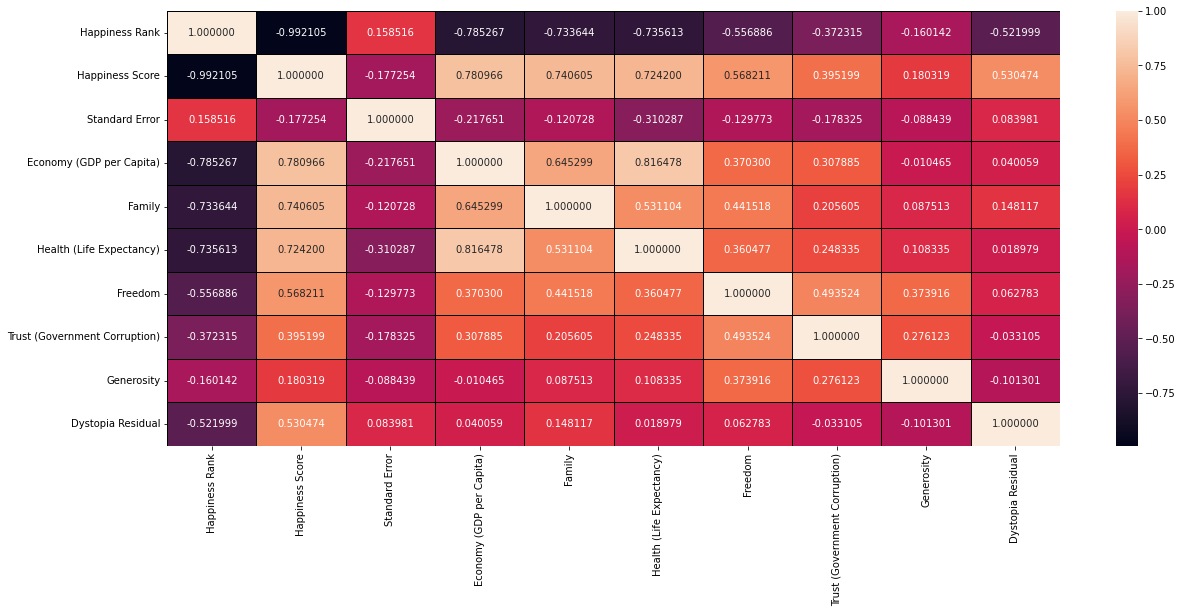

In [90]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor="black", fmt="f")

In [101]:
df.columns.values

array(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype=object)

<AxesSubplot:xlabel='Family', ylabel='Country'>

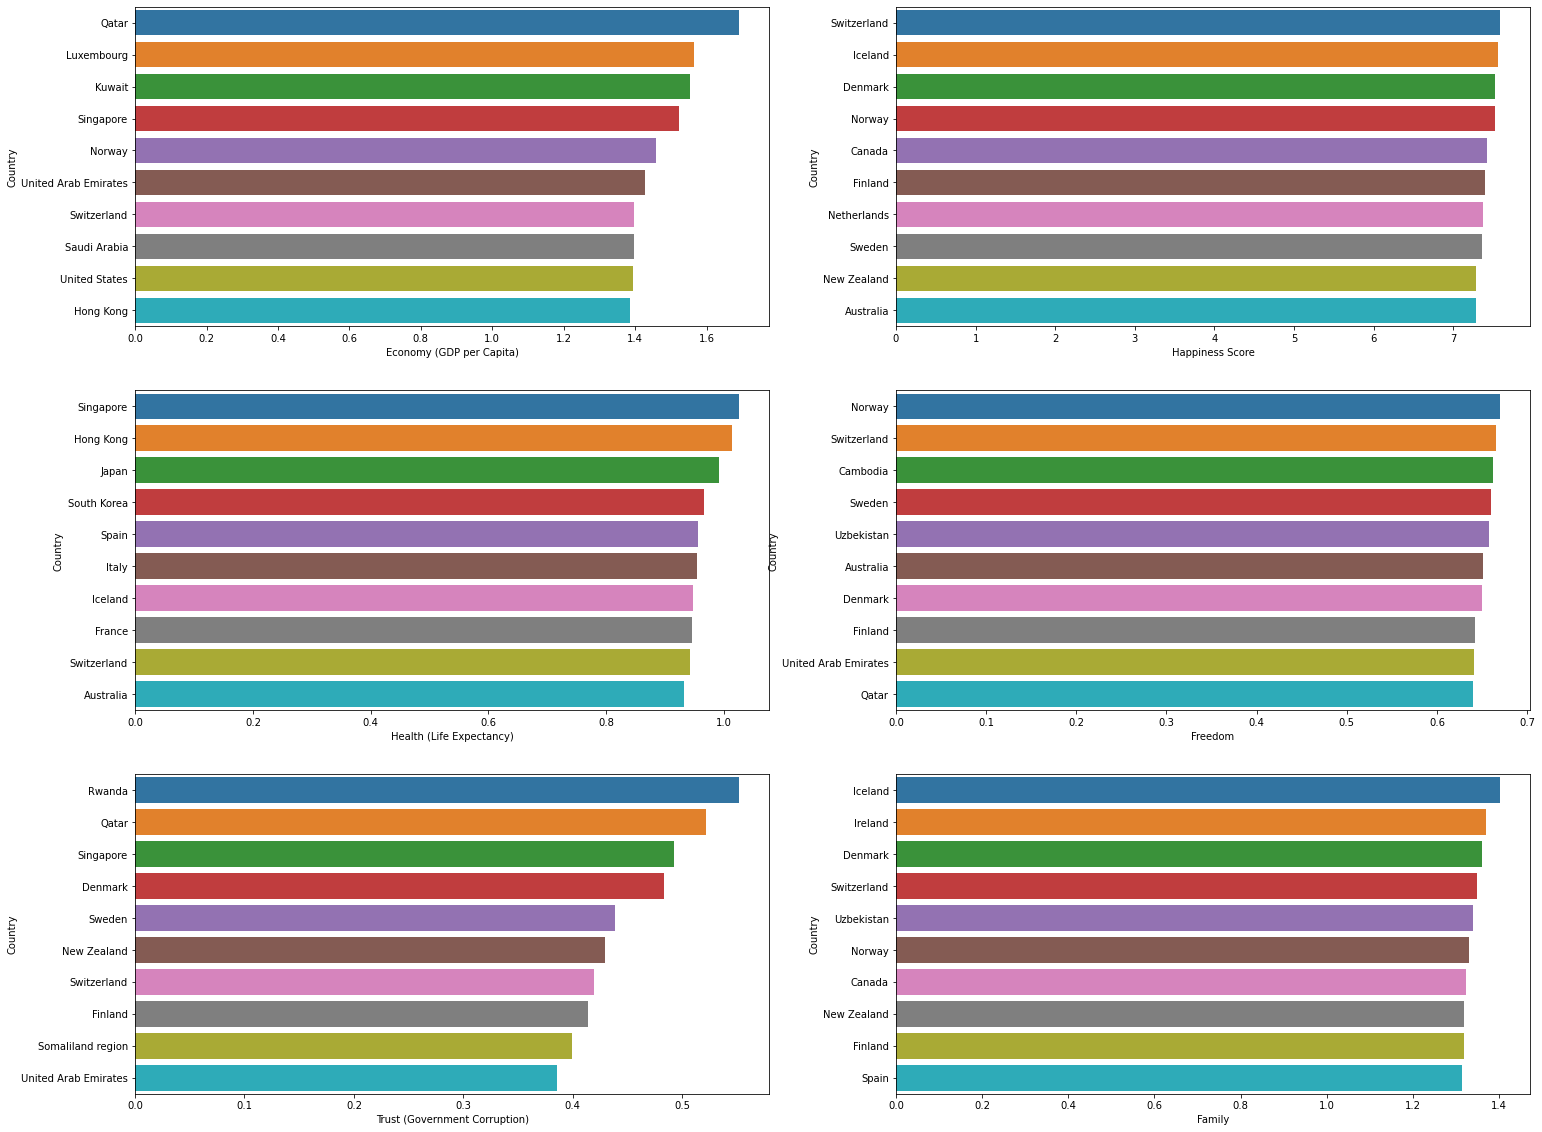

In [125]:
fig, axes= plt.subplots(2,2, figsize=(25,20))
plt.subplot(3,2,1)
sns.barplot('Economy (GDP per Capita)', 'Country', data= df.nlargest(10,'Economy (GDP per Capita)'))

plt.subplot(3,2,2)
sns.barplot('Happiness Score', 'Country', data= df.nlargest(10,'Happiness Score'))

plt.subplot(3,2,3)
sns.barplot('Health (Life Expectancy)', 'Country', data= df.nlargest(10,'Health (Life Expectancy)'))

plt.subplot(3,2,4)
sns.barplot('Freedom', 'Country', data= df.nlargest(10,'Freedom'))

plt.subplot(3,2,5)
sns.barplot('Trust (Government Corruption)', 'Country', data= df.nlargest(10,'Trust (Government Corruption)'))

plt.subplot(3,2,6)
sns.barplot('Family', 'Country', data= df.nlargest(10,'Family'))